# Palmer's Penguins
### In Machine Learning
Ryan Magnuson rmagnuson@westmont.edu\
Tutorial Credit to: Kelsey Song ksong14@g.ucla.edu

### Initial Data
This segment reads the initial .csv file for Palmer's Penguins, and begins some edits to the data, namely removing columns "sex" and "rowid".

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
(344, 9)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen 

<Figure size 1000x600 with 0 Axes>

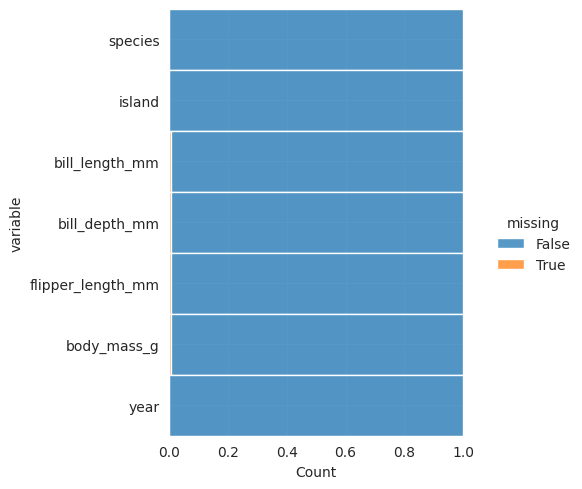

In [2]:
# Warning Suppression
def warn(*args, **kwargs): # @Override
    pass # suppression
import warnings
warnings.warn = warn

# Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data + Data Check
penguins = pd.read_csv("penguins.csv")
print(penguins.head())
print(penguins.shape)

# Remove column "sex" (Repeat N/A entries)
print()
penguins = penguins.drop("sex", axis=1)
penguins = penguins.drop("rowid", axis=1)
print(penguins.head())

# Plot 
plt.figure(figsize=(10,6))
sns.displot(
    data=penguins.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill"
)
plt.show()
plt.close()

While this graph looks almost empty, there's that sliver of orange on variables bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g. That indicates there's a little bit of missing information in those data points, so we should be sure to use .dropna().

### Data Splitting
In this section, we split the original dataset into training and testing sets. We additionally make note of which columns are numerical and categorical. To wrap it up, we take a peek at our training data.

In [3]:
# Setup
import numpy as np
from sklearn.model_selection import train_test_split

# Split data into training and testing
np.random.seed(1128) # Consistency!
train, test = train_test_split(penguins,test_size=.20)

##
# Takes data input and splits it into target/predictor vars
# @param data: dataset
# @return target/predictor vars
def prep_data(data):
    df = data.copy()
    predictor = df.drop(["species"], axis=1) # "X"
    target = df["species"] # "y"

    return (predictor,target)

# remove n/a
train = train.dropna()
test = test.dropna()

# split testing/training into predictor/target vars
pred_train, target_train = prep_data(train) # X_train, y_train
pred_test, target_test = prep_data(test) # X_test, y_test
print(pred_train.shape, pred_test.shape, target_train.shape, target_test.shape)
print(penguins["species"].unique(), penguins["island"].unique())

# split columns into num/cat
print()
num_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year'] # 'rowid',
cat_vars = ['species', 'island']

# NUM VARS #
print("TRAINING DATA")
print(train[num_vars].head())

(274, 6) (68, 6) (274,) (68,)
['Adelie' 'Gentoo' 'Chinstrap'] ['Torgersen' 'Biscoe' 'Dream']

TRAINING DATA
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
212            45.3           13.8              208.0       4200.0  2008
228            47.5           14.2              209.0       4600.0  2008
141            40.6           17.2              187.0       3475.0  2009
247            50.8           15.7              226.0       5200.0  2009
19             46.0           21.5              194.0       4200.0  2007


### Density Plot
Here, we visualize which data points we can compare, and more importantly, which data points we SHOULD compare. Density plots are excellent for numerical variables -- the further away lines are from one another on a given plot, the better the variable is as a predictor.

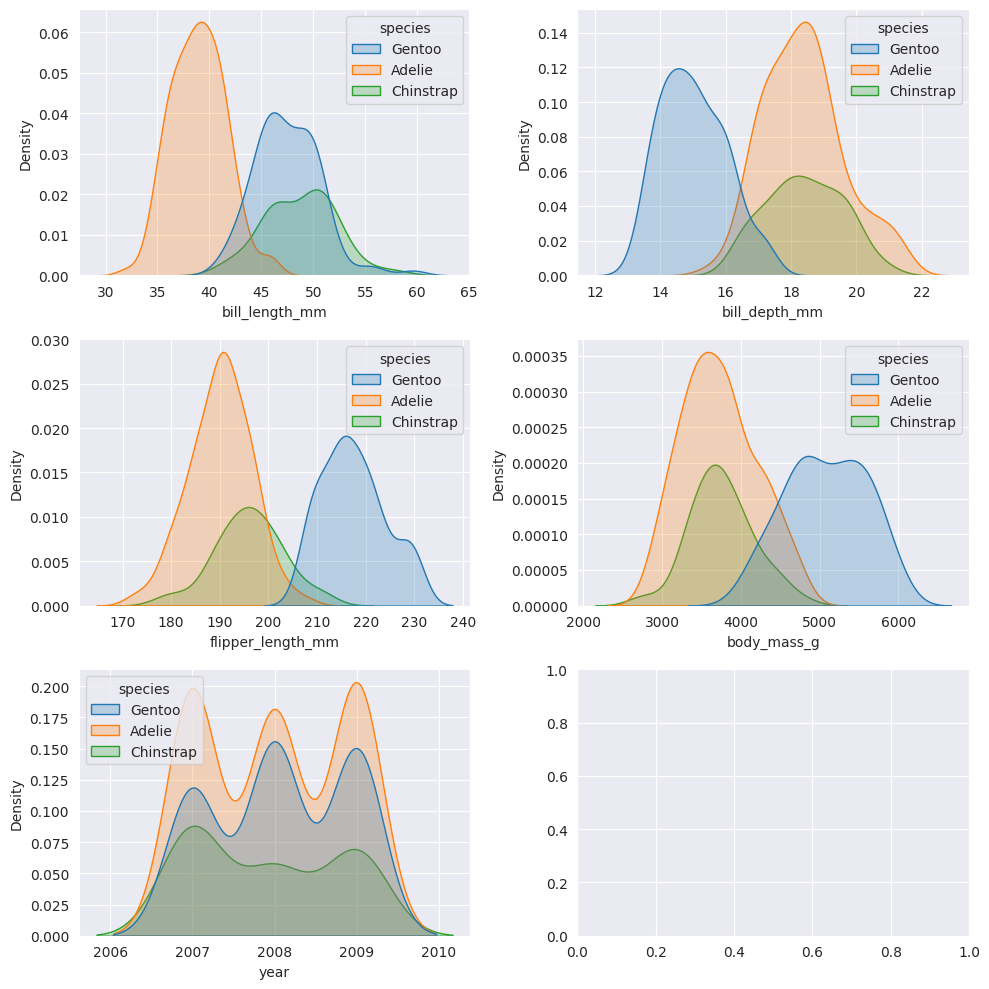

In [4]:
##
# Creates density plots for our numerical variables
# @param data dataset to be used
# @param m_cols number of columns
# @param m_rows number of rows
# @return density plot for different species base on numerical vars
def density_plot(data, m_cols, m_rows):
    fig, ax = plt.subplots(m_rows, m_cols, figsize=(10,10))

    for i in range(len(num_vars)):
        var = data[num_vars[i]]
        row = i // m_cols
        col = i % m_cols

        sns.kdeplot(x=var, hue=train["species"], fill=True, ax=ax[row,col])
        plt.tight_layout() #fix spacing

density_plot(train, 2, 3)
plt.show()
plt.close()

It looks like that with bill_length_mm and bill_depth_mm, we can cross-reference our data and effectively predict which species a given penguin is.

### Correlation Matrix
This is a way of looking at how each data point is related to all other data points. For instance, bill_length_mm is extremely correlated with itself, because it IS itself. However, flipper_length_mm with bill_depth_mm has our worst correlation, so we should avoid using that.

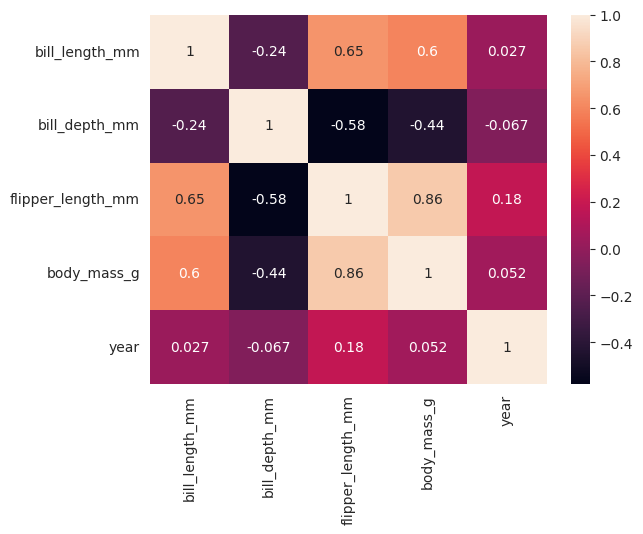

In [5]:
corrMatrix = train[num_vars].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.close()

If a given variable has HIGH correlation with one or many other variables, we should take caution when using it, as it could interact with said variables too much.

### Categorical Variables
In this mini-segment, we can see how penguin species and island are related. Lucky enough, for our data, only Gentoo are on Biscoe, only Chinstrap on Dream, and if there is any overlap of island, the result must be Adelie.

    species     island
212  Gentoo     Biscoe
228  Gentoo     Biscoe
141  Adelie      Dream
247  Gentoo     Biscoe
19   Adelie  Torgersen


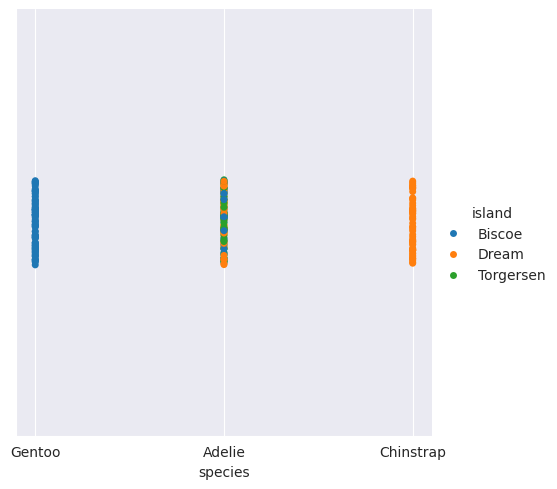

In [6]:
print(train[cat_vars].head())

sns.catplot(x="species", hue="island", data=train, height=5, aspect=.9)
plt.show()
plt.close()

For larger datasets, something as simple as this would be pretty unlikely to happen.

### P Value
Statistics class time. Here we output the Correlation Coefficient and p-value between various data points, based on our found correlation.

In [7]:
# Setup
from scipy.stats import pearsonr

##
# Computes correlation coefficients and corresponding p-vals
# @param var1 var
# @param var2 list of vars
# @return correlation coefficient and p-val
def p_val(var1, var2):
    for element in var2:
        print("CC and p-val between", var1, "and", element, "is:\n", pearsonr(train[var1], train[element]))

penguin_stats = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
p_val("flipper_length_mm", penguin_stats)

CC and p-val between flipper_length_mm and bill_length_mm is:
 PearsonRResult(statistic=0.6485761304609682, pvalue=4.265941891296085e-34)
CC and p-val between flipper_length_mm and bill_depth_mm is:
 PearsonRResult(statistic=-0.5796419104033258, pvalue=5.422931066613222e-26)
CC and p-val between flipper_length_mm and flipper_length_mm is:
 PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)
CC and p-val between flipper_length_mm and body_mass_g is:
 PearsonRResult(statistic=0.8636716281205853, pvalue=6.62730348660948e-83)


## Machine Learning Models
### Logistic Regression
Here, we're looking at which combination of data points returns the highest score in the output below. That'll be our predicting combo. We calculate said score with Logistic Regression

In [8]:
# Setup
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

le = preprocessing.LabelEncoder() #label encoder object
pred_train["island"] = le.fit_transform(pred_train["island"])

LogReg = LogisticRegression(max_iter=1500) # Used for column scoring | originally -> (max_iter=500)

##
# Trains and evaluates a model via cross validation on the cols of the data with selected indices
# @param cols list of columns/vars
# @return cross validation score
def check_column_score(cols):
    print("training w/ cols: " + str(cols))
    return cross_val_score(LogReg, pred_train[cols], target_train.values, cv=5)

combos = [['island', 'bill_length_mm', 'bill_depth_mm'],
          ['island', 'bill_length_mm', 'body_mass_g'],
          ['island', 'bill_depth_mm', 'body_mass_g']
]
for combo in combos:
    score = check_column_score(combo)
    print("CV score is: " + str(np.round(score, 3)))

training w/ cols: ['island', 'bill_length_mm', 'bill_depth_mm']
CV score is: [0.982 0.964 0.982 0.945 1.   ]
training w/ cols: ['island', 'bill_length_mm', 'body_mass_g']
CV score is: [0.964 0.982 0.964 0.945 0.944]
training w/ cols: ['island', 'bill_depth_mm', 'body_mass_g']
CV score is: [0.8   0.8   0.8   0.8   0.796]


The first combination, ['island', 'bill_length_mm', 'bill_depth_mm'], has the best cross-validation scores. 

#### Data Decision
Once we decided on our final variables (Line 1), we define the plot_regions() method, which is the final output of our models. This is a visual representation of the model's predictions, and therefore pretty darn important.

In [9]:
final_vars = ['island', 'bill_length_mm', 'bill_depth_mm']
le = preprocessing.LabelEncoder()
pred_train['island'] = le.fit_transform(pred_train['island'])
pred_test['island'] = le.fit_transform(pred_test['island'])

target_test_dc = le.fit_transform(target_test)

##
# creates graphs with decision regions corresponding to model
# @param model: machine learning model
# @param pred: predictor variable
# @param target: target variable
# @return a graph with decision regions based on model
def plot_regions(model, pred, target):
    model.fit(pred,target)

    length = pred['bill_length_mm']
    depth = pred["bill_depth_mm"]

    grid_x = np.linspace(length.min(), length.max(), 501)
    grid_y = np.linspace(depth.min(), depth.max(), 501)

    # below are some awful variable names, I am so sorry. (it's for the grid)
    xx, yy = np.meshgrid(grid_x, grid_y)
    np.shape(xx), np.shape(yy)

    XX = xx.ravel()
    YY = yy.ravel()

    p = model.predict(np.c_[XX,YY])
    p = p.reshape(xx.shape)
    fig, ax = plt.subplots(1)

    # plot decision regions
    ax.contour(xx, yy, p, cmap="jet", alpha=.2)
    ax.scatter(length, depth, c=target, cmap="jet")
    ax.set(xlabel="bill_length_mm", ylabel="bill_depth_mm")


### Support Vector Machine (SVM)
This is a linear model, calculating the best score to find the best prediction. 

In [10]:
# Setup
from sklearn import svm

best_score = -np.inf # begin at -infinity
N = 30 # largest max 30
scores = np.zeros(N)

for i in range(1, N+1):
    SVM = svm.SVC(kernel="linear", C=i, random_state=1128)
    scores[i-1] = cross_val_score(SVM, pred_train[final_vars], target_train, cv=10).mean()
    if scores[i-1] > best_score:
        best_C = i
        best_score = scores[i-1]

print(best_C, best_score)

2 0.9962962962962962


The first value here, 2, is our best c-value. It has a cross-validation score of around .99.

#### Best Graph + Best C
This is a simple representation of found c-values, as per our best found score.

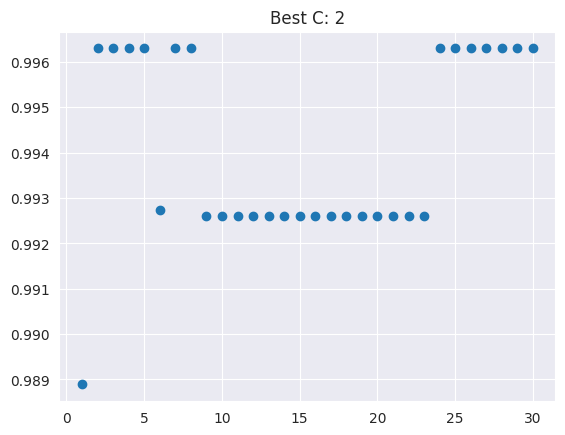

In [11]:
##
# creates a graph of values w/ scores
# @param max largest max value
# @param scores cross validation scores
# @param best_val best val from cross validation
# @param element parameter we're getting the best val for
# @return a graph of vals w/ scores
def best_graph(max, scores, best_val, element):
    fig, ax = plt.subplots(1)
    ax.scatter(np.arange(1, max+1), scores)
    ax.set(title="Best " + element + ": " + str(best_val))

best_graph(N, scores, best_C, "C")
plt.show()
plt.close()


#### SVM Final Output
The moment you've all been waiting for: real predictions! We'll be using our best C from before in order to run the Support Vector Machine (SVM). In the terminal output, we can see our mistakes, and accuracy.

['Adelie' 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo']
[[24  1  0]
 [ 0 13  0]
 [ 0  0 30]] 0.9852941176470589


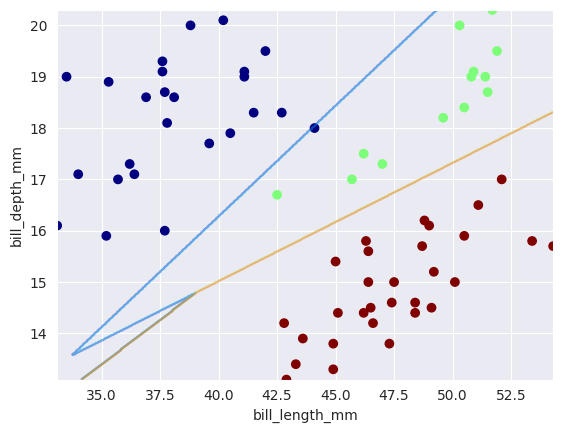

In [12]:
# Setup
from sklearn.metrics import confusion_matrix

SVM = svm.SVC(kernel="linear", C=best_C, random_state=1128)
model = SVM.fit(pred_train[final_vars], target_train)

target_test_pred = model.predict(pred_test[final_vars])
print(target_test_pred)

cm = confusion_matrix(target_test, target_test_pred)
print(cm, model.score(pred_test[final_vars], target_test))

plot_regions(SVM, pred_test[['bill_length_mm', 'bill_depth_mm']], target_test_dc) # plot results (ignore warning (?) )
plt.show()
plt.close()

This model made a single mistake. Not too shabby, but it could be better. 

### Random Forest
This is a non-linear model! It also calculates a best score in order to make a final prediction.

250
0.9816137566137566

[[25  0  0]
 [ 0 13  0]
 [ 0  0 30]] 1.0


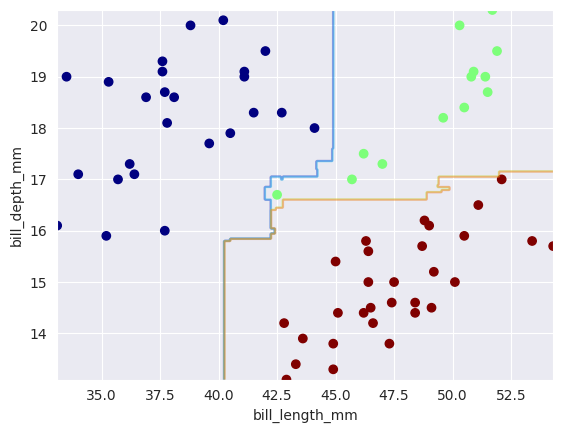

In [13]:
# Setup
from sklearn.ensemble import RandomForestClassifier

best_score = 0
best_n = None #stub for just in case
N_vals = [10,50,100,250,500]

for n in N_vals:
    F = RandomForestClassifier(n_estimators=n, random_state=1128)
    cvs = cross_val_score(F, pred_train[final_vars], target_train, cv=10).mean()
    if cvs > best_score:
        best_n = n
        best_score = cvs

print(best_n)
print(best_score)

# more confusing var names incoming
print()
m = RandomForestClassifier(best_n, random_state=1128)
model2 = m.fit(pred_train[final_vars], target_train)

target_test_pred = model2.predict(pred_test[final_vars]) #confusion matrix
c = confusion_matrix(target_test, target_test_pred)

print(c, model2.score(pred_test[final_vars], target_test))

plot_regions(m, pred_test[['bill_length_mm', 'bill_depth_mm']], target_test_dc)
plt.show()
plt.close()

No mistakes! That's pretty good. We have one last model to look at, however.

### K Nearest Neighbor Model (KNN)
This stands for "k nearest neighbor". It once again calculates a "best score" in order to make a prediction, in this case by comparing neighboring data points. In this first section, we have a graph for those found neighbors.

1 0.970767195767196


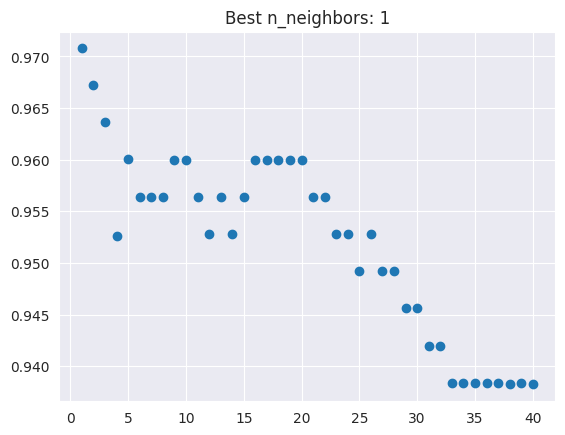

In [14]:
# Setup
from sklearn.neighbors import KNeighborsClassifier

best_score = -np.inf
N = 40 # largest max n_neighbors
scores = np.zeros(N)

for i in range(1, N+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores[i-1] = cross_val_score(knn, pred_train[final_vars], target_train, cv=10).mean()
    if scores[i-1] > best_score:
        best_n_neighbors = i
        best_score = scores[i-1]

print(best_n_neighbors, best_score)

best_graph(N, scores, best_n_neighbors, "n_neighbors") #make a graph
plt.show()
plt.close()

Both our terminal output and graph support that the best found value was 1.

#### KNN Final Output
In this last section, we grab the final output for the KNN model. 

[[24  1  0]
 [ 0 13  0]
 [ 0  0 30]] 0.9852941176470589


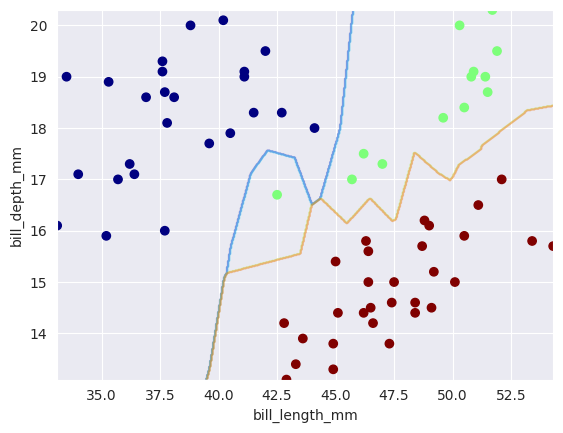

In [15]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(pred_train[final_vars], target_train)

target_test_pred = knn.predict(pred_test[final_vars])

cm = confusion_matrix(target_test, target_test_pred)
print(cm, knn.score(pred_test[final_vars], target_test))

# plot the knn graph
plot_regions(knn, pred_test[['bill_length_mm', 'bill_depth_mm']], target_test_dc)
plt.show()
plt.close()

This model also made a single mistake! It seems Random Forest was our most accurate model, at least in this case.